In [1]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,auc ,roc_curve,accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import zero_one_loss
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

import umap
from sklearn.decomposition import PCA
from mlens.visualization import pca_comp_plot,corr_X_y
from yellowbrick.features.radviz import RadViz

import time
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
from sklearn.metrics import roc_auc_score,auc ,roc_curve,accuracy_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings("ignore")


[MLENS] backend: threading


In [2]:
covid_Data = pd.read_excel('New_BDD.xlsx')
covid_Data.iloc[10:16, :]

Classification  Sex  Age  Platelet   Lymphocyte           PLR  ALT value   \
10               1    1   43        153         0.06  2550.000000        49.5   
11               1    1   49        165         1.48   111.486486        25.0   
12               1    0   18        116         0.42   276.190476        36.2   
13               1    1   62        128         1.28   100.000000        11.4   
14               1    0   49         98         1.18    83.050847        55.4   
15               1    0   68        225         2.84    79.225352        61.4   

    AST value   LDH value   D-dimers     CRP   Weight  Comorbidites  
10        56.7         607       1.05  36.74      83.0    AST _ PER  
11        45.3         846       0.90  14.99      77.0          CHD  
12        31.7         604       1.77  25.14      68.0          Ntr  
13        13.2         147       0.41  16.48      93.0          DIA  
14        41.9         671       0.35  40.82      66.0      TUB _ O  
15        59.2         962       1.15  12.63      81.0          Ntr

In [3]:
covid_Data['Classification'].value_counts()

0    191
1    146
Name: Classification, dtype: int64

In [4]:
names = covid_Data.columns
i=0
for n in  names:
# count number of rows with missing values
    n_miss = covid_Data[[n]].isnull().sum()
    perc = n_miss / covid_Data.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    i+=1

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 12 (3.6%)
> 10, Missing: 12 (3.6%)
> 11, Missing: 4 (1.2%)
> 12, Missing: 0 (0.0%)


In [5]:
covid_Data =covid_Data.dropna()
covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Classification  322 non-null    int64  
 1   Sex             322 non-null    int64  
 2   Age             322 non-null    int64  
 3   Platelet        322 non-null    int64  
 4   Lymphocyte      322 non-null    float64
 5   PLR             322 non-null    float64
 6   ALT value       322 non-null    float64
 7   AST value       322 non-null    float64
 8   LDH value       322 non-null    int64  
 9   D-dimers        322 non-null    float64
 10  CRP             322 non-null    float64
 11   Weight         322 non-null    float64
 12  Comorbidites    322 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 35.2+ KB


In [6]:
covid_Data= covid_Data.reset_index(drop=True)

In [7]:
covid_Data

Classification  Sex  Age  Platelet   Lymphocyte          PLR  ALT value   \
0                 1    0   73        198         1.97  100.507614        40.0   
1                 1    1   52        221         0.49  451.020408        73.6   
2                 1    1   19        416         1.29  322.480620        39.0   
3                 1    1   94        191         0.65  293.846154        34.1   
4                 1    1   93        175         1.12  156.250000        20.0   
..              ...  ...  ...        ...          ...         ...         ...   
317               0    1   48         97         3.06   31.699346        58.9   
318               0    0   60        166         0.48  345.833333        56.6   
319               0    1   22        186         1.73  107.514451        21.7   
320               0    1   39         83         1.14   72.807018        20.0   
321               0    1   67         48         0.17  282.352941        35.3   

     AST value   LDH value   D-dimers     CRP   Weight  Comorbidites  
0          28.3         377       0.82   4.40      56.0          Ntr  
1          58.1         745       1.07  23.45      65.0          Ntr  
2          50.2         697       0.29  15.78      62.0          CHD  
3          42.6         699       0.95  33.25      35.0    DIA _ HTA  
4          20.3         287       1.38   6.32      74.0          Ntr  
..          ...         ...        ...    ...       ...          ...  
317        61.2         963       1.15  12.63      81.0          Ntr  
318        56.8         248       1.72   3.02      76.0          Ntr  
319        19.4        1164       1.32  13.34      95.0          Ntr  
320        38.1         956       2.45  52.89      87.0          Ntr  
321        49.5         749       0.40   5.73      90.0          Ntr  

[322 rows x 13 columns]

In [8]:
covid_Data['Classification'].value_counts()

0    191
1    131
Name: Classification, dtype: int64

In [9]:
Encoded_Mean_Dict = covid_Data.groupby(['Comorbidites'])['Classification'].mean().to_dict()

covid_Data['Comorbidites_Encoded'] = covid_Data['Comorbidites'].map(Encoded_Mean_Dict)

covid_Data[['Comorbidites','Comorbidites_Encoded']].head()

covid_Data = covid_Data.drop('Comorbidites', axis = 1)


covid_Data.iloc[10:16, :]

Classification  Sex  Age  Platelet   Lymphocyte           PLR  ALT value   \
10               1    1   43        153         0.06  2550.000000        49.5   
11               1    1   49        165         1.48   111.486486        25.0   
12               1    0   18        116         0.42   276.190476        36.2   
13               1    1   62        128         1.28   100.000000        11.4   
14               1    0   49         98         1.18    83.050847        55.4   
15               1    0   68        225         2.84    79.225352        61.4   

    AST value   LDH value   D-dimers     CRP   Weight   Comorbidites_Encoded  
10        56.7         607       1.05  36.74      83.0                1.0000  
11        45.3         846       0.90  14.99      77.0                0.4375  
12        31.7         604       1.77  25.14      68.0                0.3125  
13        13.2         147       0.41  16.48      93.0                0.5000  
14        41.9         671       0.35  40.82      66.0                1.0000  
15        59.2         962       1.15  12.63      81.0                0.3125

In [10]:
y = covid_Data.Classification
data_fea = covid_Data.drop(['Classification'],axis= 1)

([<matplotlib.patches.Wedge at 0x1d850806fa0>,
 [Text(0.3173870492443031, -1.0532167207996626, '0'),
  Text(-0.3173871478535685, 1.0532166910837377, '1')],
 [Text(0.17312020867871075, -0.5744818477089068, '59.3%'),
  Text(-0.1731202624655828, 0.5744818315002205, '40.7%')])

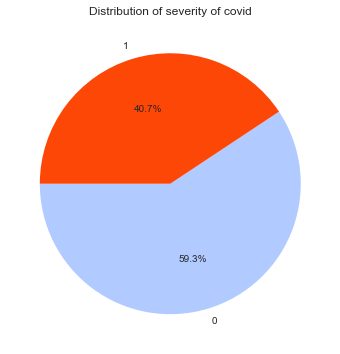

In [11]:
y_counts =y.value_counts()
colors = ['#b1caff','#fd4706'] #b1caff
plt.figure(figsize=(12,6))
plt.title('Distribution of severity of covid')
plt.pie(y_counts,labels=y_counts.index,autopct='%1.1f%%',colors= colors ,startangle=180)


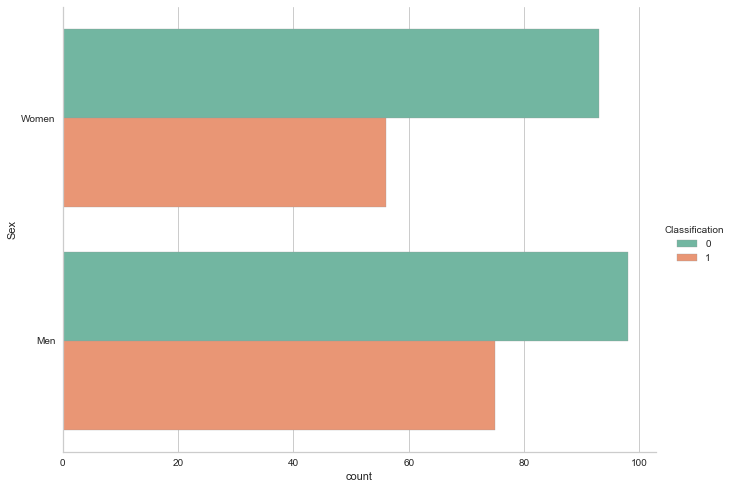

In [13]:
g= sns.catplot(y='Sex', hue='Classification', kind="count",height=6.7, aspect=8.7/6.7,
            palette="Set2", edgecolor=".6", 
            data=covid_Data)
g.set_yticklabels(["Women" ,"Men"])


In [14]:
scaler = preprocessing.StandardScaler()
scaled_Data = pd.DataFrame(scaler.fit_transform(data_fea.values),
                        columns=data_fea.columns,index=data_fea.index)
scaled_Data['Classification']=y

[Text(0, 0, 'Women'), Text(1, 0, 'Men')]

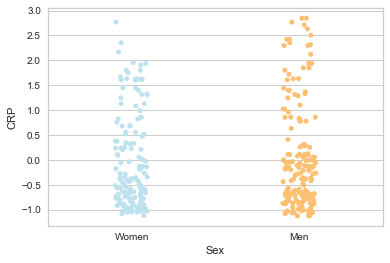

In [15]:
ax = sns.stripplot(x='Sex', y='CRP', data=scaled_Data,
                   palette='RdYlBu_r', dodge=True)

ax.set_xticklabels(["Women" ,"Men"])

[Text(0, 0, 'Women'), Text(1, 0, 'Men')]

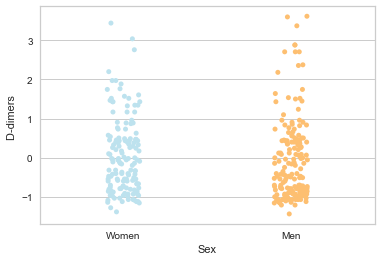

In [16]:
ax = sns.stripplot(x='Sex', y='D-dimers ', data=scaled_Data,
                   palette='RdYlBu_r', dodge=True)

ax.set_xticklabels(["Women" ,"Men"])

[Text(0, 0, 'Women'), Text(1, 0, 'Men')]

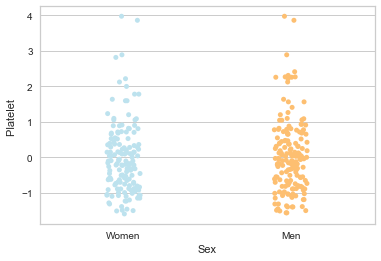

In [17]:
ax = sns.stripplot(x='Sex', y= 'Platelet ', data=scaled_Data,
                   palette='RdYlBu_r', dodge=True)

ax.set_xticklabels(["Women" ,"Men"])

In [18]:
covid_Data.columns

Index(['Classification', 'Sex', 'Age', 'Platelet ', 'Lymphocyte ', 'PLR',
       'ALT value ', 'AST value ', 'LDH value ', 'D-dimers ', 'CRP',
       ' Weight ', 'Comorbidites_Encoded'],
      dtype='object')

In [19]:
covid_Data['stage'] = pd.cut(covid_Data.Age , bins=[0,15,30,45,60,75,90,105], labels=[1,2,3,4,5,6,7])


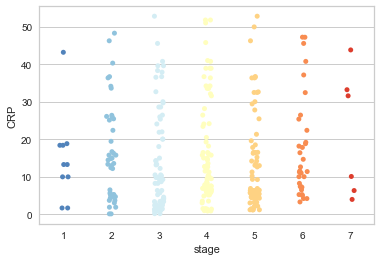

In [20]:
ax = sns.stripplot(x='stage', y='CRP', data=covid_Data,
                   palette='RdYlBu_r', dodge=True)


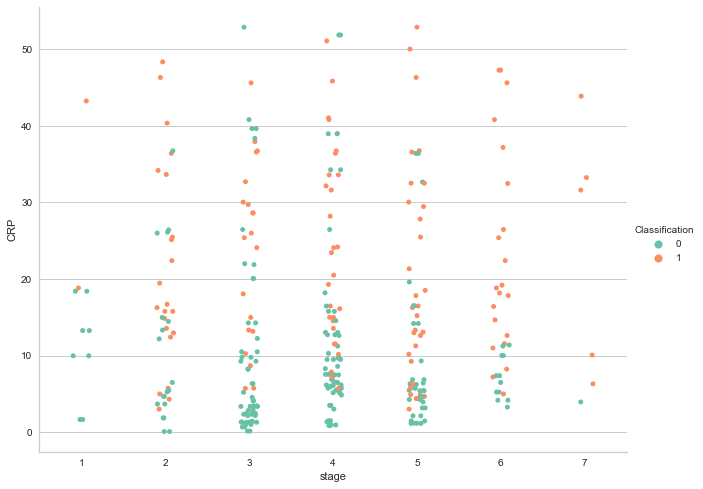

In [21]:
g= sns.catplot(x='stage', y = 'CRP', hue='Classification',height=6.7, aspect=8.7/6.7,
            palette="Set2", edgecolor=".6", 
            data=covid_Data)

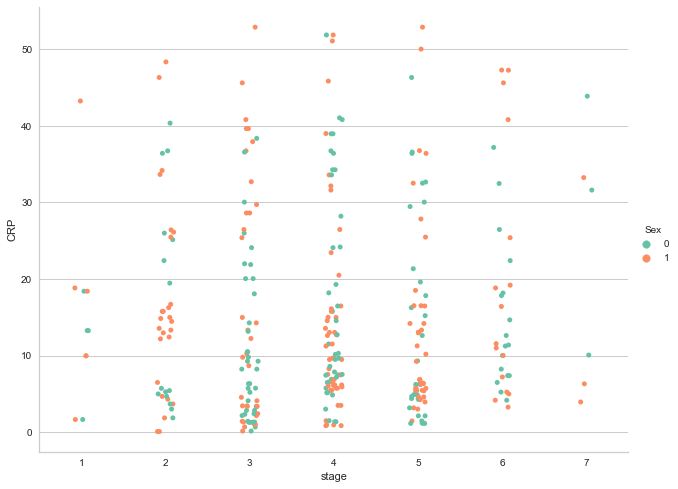

In [22]:
g= sns.catplot(x='stage', y = 'CRP', hue='Sex',height=6.7, aspect=8.7/6.7,
            palette="Set2", edgecolor=".6", 
            data=covid_Data)

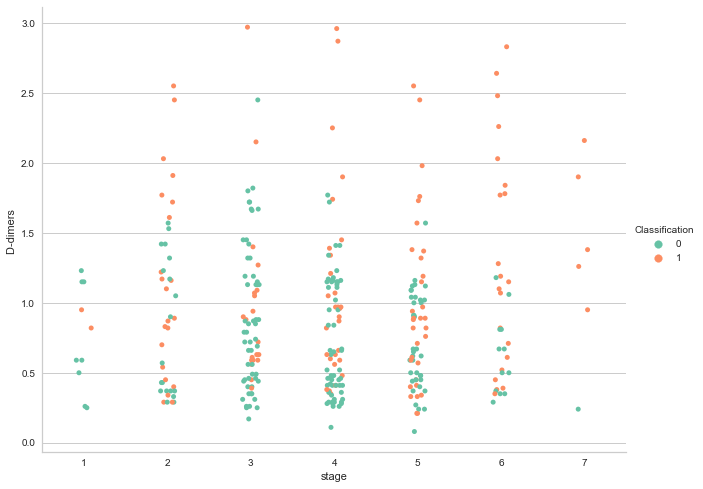

In [23]:
g= sns.catplot(x='stage', y = 'D-dimers ', hue='Classification',height=6.7, aspect=8.7/6.7,
            palette="Set2", edgecolor=".6", 
            data=covid_Data)

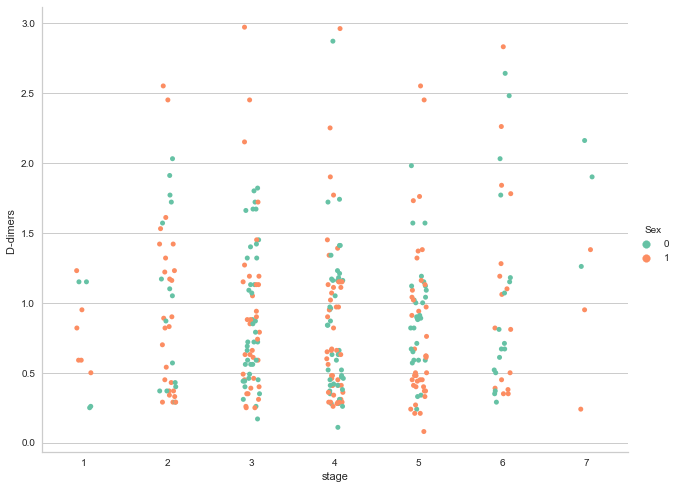

In [24]:
g= sns.catplot(x='stage', y = 'D-dimers ' , hue='Sex',height=6.7, aspect=8.7/6.7,
            palette="Set2", edgecolor=".6", data=covid_Data)

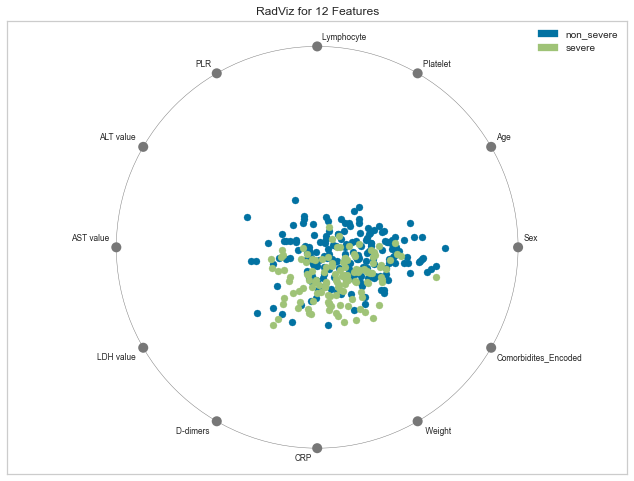

<AxesSubplot:title={'center':'RadViz for 12 Features'}>

In [25]:
features =[ 'Sex', 'Age', 'Platelet ','Lymphocyte ', 'PLR', 'ALT value ', 'AST value ', 'LDH value ',
            'D-dimers ', 'CRP', ' Weight ','Comorbidites_Encoded']
classes = ['non_severe','severe']
X  = scaled_Data[features] 
visualizer = RadViz(classes =classes, features = features , size = (800,600))

# Fit the data to the visualizer
visualizer.fit(X,y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()


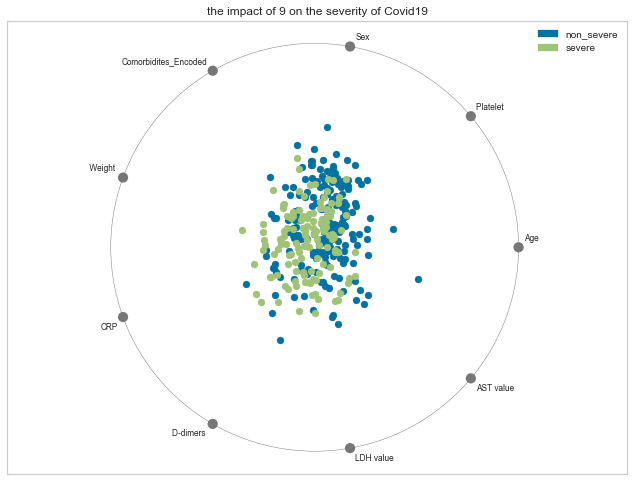

<AxesSubplot:title={'center':'the impact of 9 on the severity of Covid19'}>

In [26]:
features_R=['Age','Platelet ','Sex','Comorbidites_Encoded' ,' Weight ','CRP', 'D-dimers ', 'LDH value ' ,'AST value ']  
X_R = scaled_Data[features_R]
visualizer = RadViz( title="the impact of 9 on the severity of Covid19" ,classes =classes, features = features_R ,palette='RdGy', size = (800,600))

# Fit the data to the visualizer
visualizer.fit(X_R,y)

# Transform the data
visualizer.transform(X_R)

# Draw/show/poof the data
visualizer.poof()

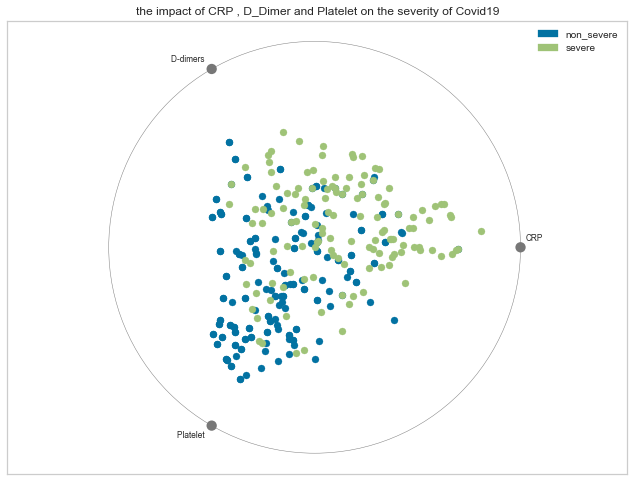

<AxesSubplot:title={'center':'the impact of CRP , D_Dimer and Platelet on the severity of Covid19'}>

In [27]:
features_R=['CRP', 'D-dimers ',  'Platelet ']
X_R = scaled_Data[features_R]
visualizer = RadViz( title="the impact of CRP , D_Dimer and Platelet on the severity of Covid19" ,classes =classes, features = features_R ,palette='RdGy', size = (800,600))

# Fit the data to the visualizer
visualizer.fit(X_R,y)

# Transform the data
visualizer.transform(X_R)

# Draw/show/poof the data
visualizer.poof()


[Text(0, 0, 'Women'), Text(1, 0, 'Men')]

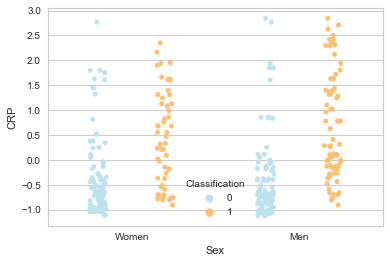

In [28]:
ax = sns.stripplot(x='Sex', y='CRP', hue='Classification', data=scaled_Data,
                   palette='RdYlBu_r', dodge=True)

ax.set_xticklabels(["Women" ,"Men"])

In [29]:
CRP_non_sevre = covid_Data[covid_Data['Classification']==0]['CRP']
CRP_sevre =covid_Data[covid_Data['Classification']==1]['CRP']

In [30]:
CRP_sevre.reset_index(inplace=True, drop=True)


In [31]:
CRP_non_sevre.reset_index(inplace=True, drop=True)

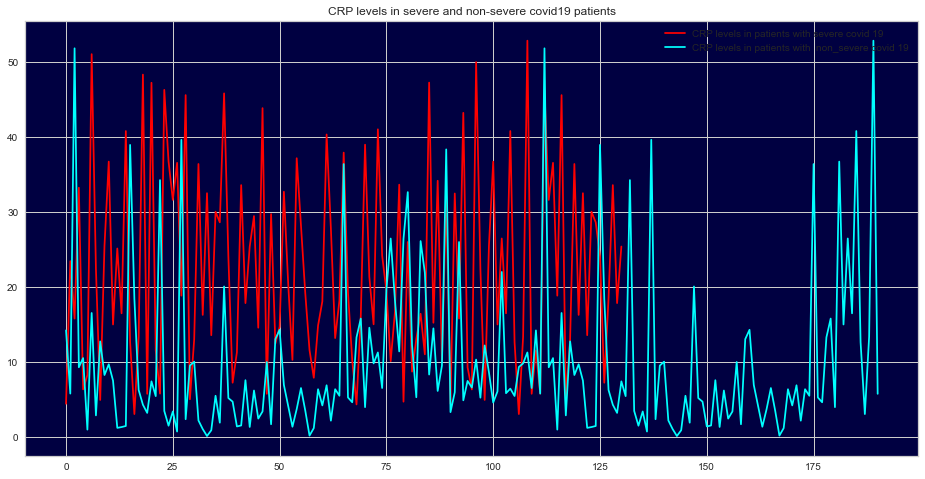

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(CRP_sevre, color='red', label='CRP levels in patients with severe covid 19 ')
plt.plot(CRP_non_sevre, color='cyan', label='CRP levels in patients with  non_severe covid 19')
plt.title('CRP levels in severe and non-severe covid19 patients' )
plt.legend()

In [33]:
Dimer_non_sevre = covid_Data[covid_Data['Classification']==0]['D-dimers ']
Dimer_sevre =covid_Data[covid_Data['Classification']==1]['D-dimers ']

In [34]:
Dimer_sevre.reset_index(inplace=True, drop=True)

In [35]:
Dimer_non_sevre.reset_index(inplace=True, drop=True)

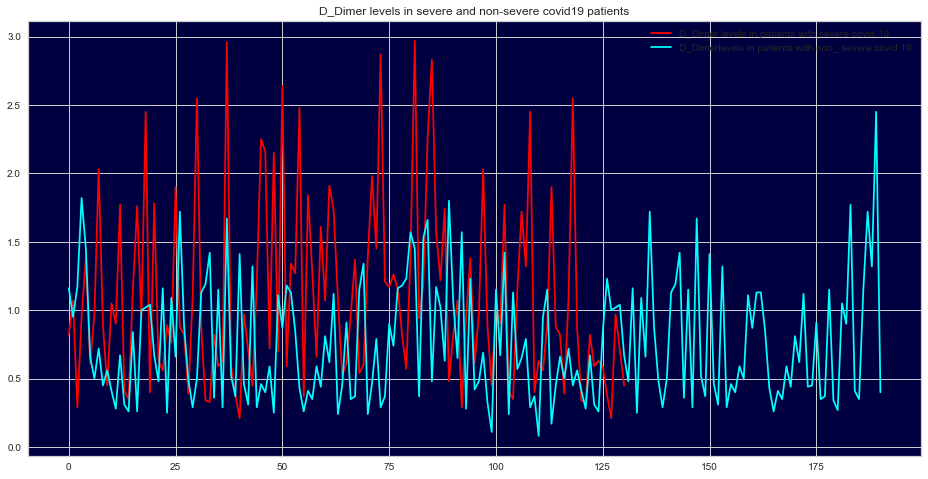

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(Dimer_sevre, color='red', label='D_Dimer levels in patients with severe covid 19')
plt.plot(Dimer_non_sevre, color='cyan', label='D_Dimerlevels in patients with non_ severe covid 19')
plt.title('D_Dimer levels in severe and non-severe covid19 patients')
plt.legend()

In [37]:
Platelet_non_sevre = covid_Data[covid_Data['Classification']==0]['Platelet ']
Platelet_sevre =covid_Data[covid_Data['Classification']==1]['Platelet ']

In [38]:
Platelet_non_sevre.reset_index(inplace=True, drop=True)

In [39]:
Platelet_sevre.reset_index(inplace=True, drop=True)

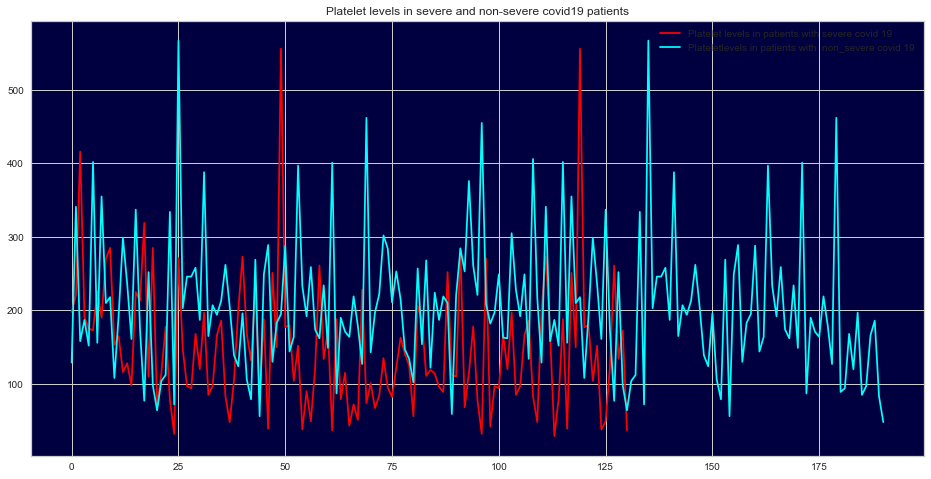

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(Platelet_sevre, color='red', label='Platelet levels in patients with severe covid 19')
plt.plot(Platelet_non_sevre, color='cyan', label='Plateletlevels in patients with  non_severe covid 19')
plt.title('Platelet levels in severe and non-severe covid19 patients')
plt.legend()

In [11]:
scaler = preprocessing.StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform( data_fea.values),
                        columns= data_fea.columns,index= data_fea.index)

In [12]:
train, test, y_train, y_test = train_test_split(data_scale, y, test_size=0.3, random_state=1)

In [13]:
y_train.value_counts()

0    131
1     94
Name: Classification, dtype: int64

In [14]:
y_test.value_counts()

0    60
1    37
Name: Classification, dtype: int64

<AxesSubplot:title={'center':'features scores'}>

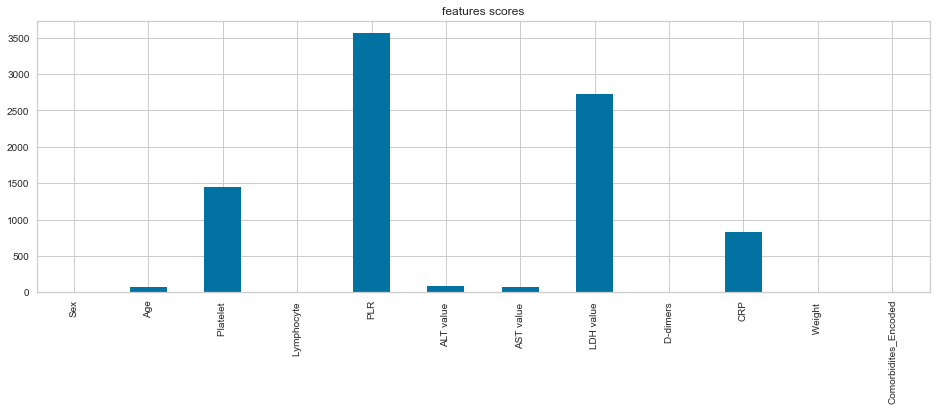

In [16]:
chi_scores = chi2(data_fea,y)
scores = pd.Series(chi_scores[0],index = data_fea.columns)
scores.sort_values(ascending = True )
plt.title('features scores')
scores.plot.bar(color=["r"])
scores.plot.bar(figsize = (16,5))

<AxesSubplot:title={'center':'p_values '}>

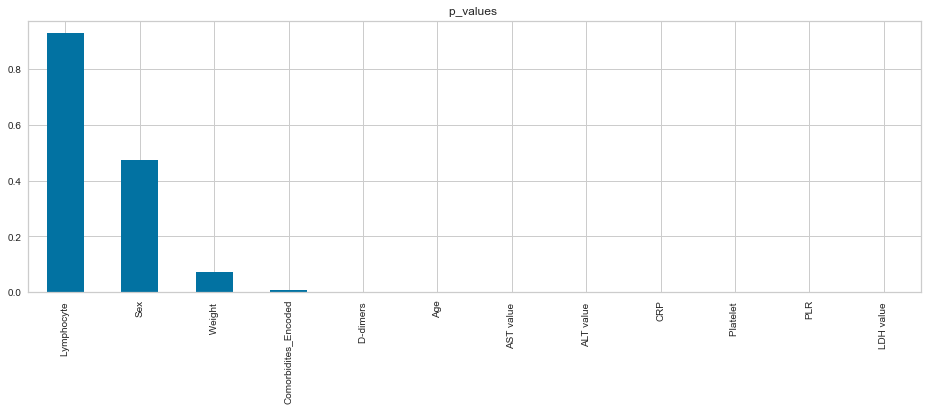

In [17]:
p_values = pd.Series(chi_scores[1],index = data_fea.columns)
p_values.sort_values(ascending = False ,inplace=True)
plt.title('p_values ')
p_values.plot.bar()
p_values.plot.bar(figsize = (16,5))

In [18]:
train_chi2 = train[['Platelet ', 'PLR' , 'LDH value ','CRP' ]]
test_chi2 = test[['Platelet ', 'PLR' , 'LDH value ','CRP' ]]

In [19]:
X = data_scale.iloc[:, 0:13].values
#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(X)
                        

In [20]:
Anova = SelectKBest(score_func=f_classif, k='all')
Anova.fit(X, y)
X_Anova = Anova.transform(X)


Feature 0: 1.100845
Feature 1: 8.643707
Feature 2: 31.186155
Feature 3: 0.011839
Feature 4: 4.155253
Feature 5: 14.050509
Feature 6: 9.840191
Feature 7: 25.616810
Feature 8: 29.377581
Feature 9: 88.456504
Feature 10: 0.841460
Feature 11: 76.610546


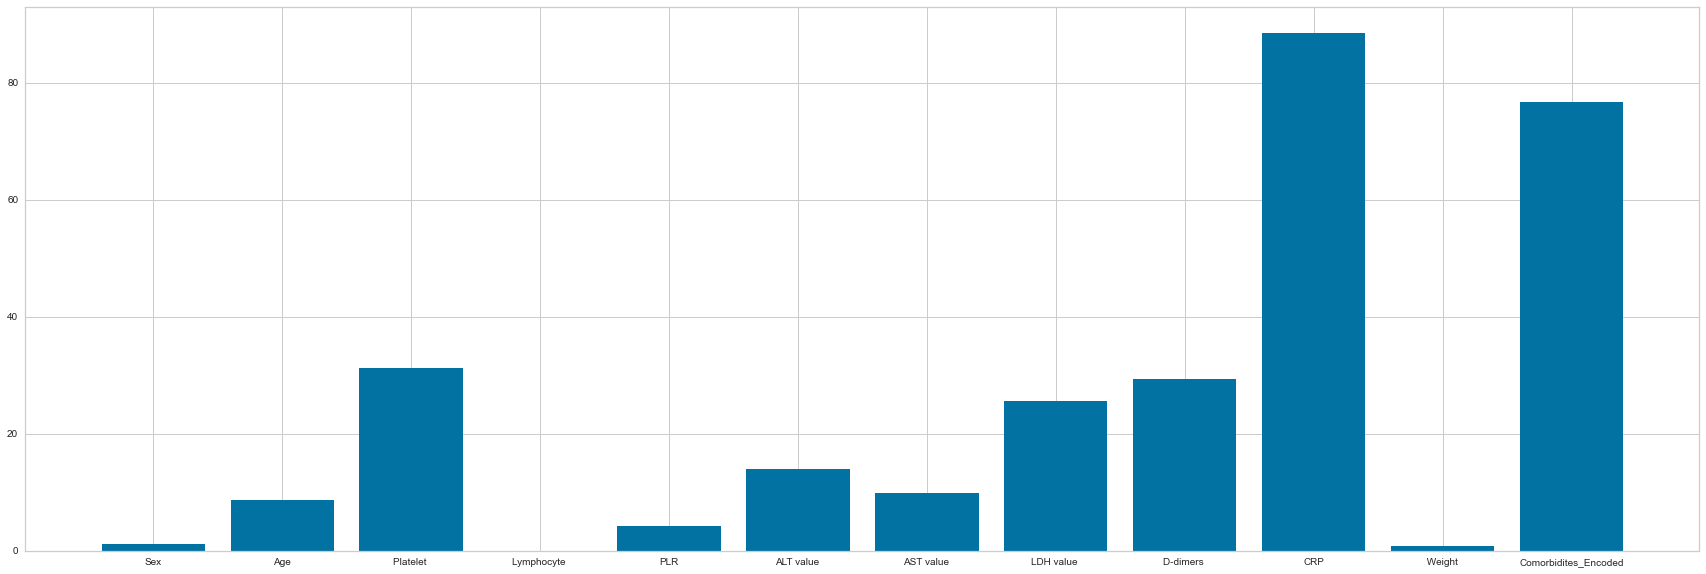

In [21]:
for i in range(len(Anova.scores_)):
    print('Feature %d: %f' % (i, Anova.scores_[i]))

#plt.bar([i for i in range(len(Anova.scores_))],  Anova.scores_ )
fig = plt.figure(figsize = (30, 10))
plt.bar([name for name in (data_fea.columns)],  Anova.scores_ )
plt.show()

In [22]:
train_anova = train[['Platelet ','LDH value ', 'D-dimers ','CRP','Comorbidites_Encoded']]
test_anova = test[['Platelet ','LDH value ', 'D-dimers ','CRP','Comorbidites_Encoded' ]]


In [23]:
M_info = SelectKBest(score_func=mutual_info_classif, k='all')
M_info.fit(X, y)
X_M_info = M_info.transform(X)


Feature 0: 0.004809
Feature 1: 0.057997
Feature 2: 0.133681
Feature 3: 0.000000
Feature 4: 0.053277
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.196472
Feature 9: 0.255389
Feature 10: 0.052928
Feature 11: 0.115360


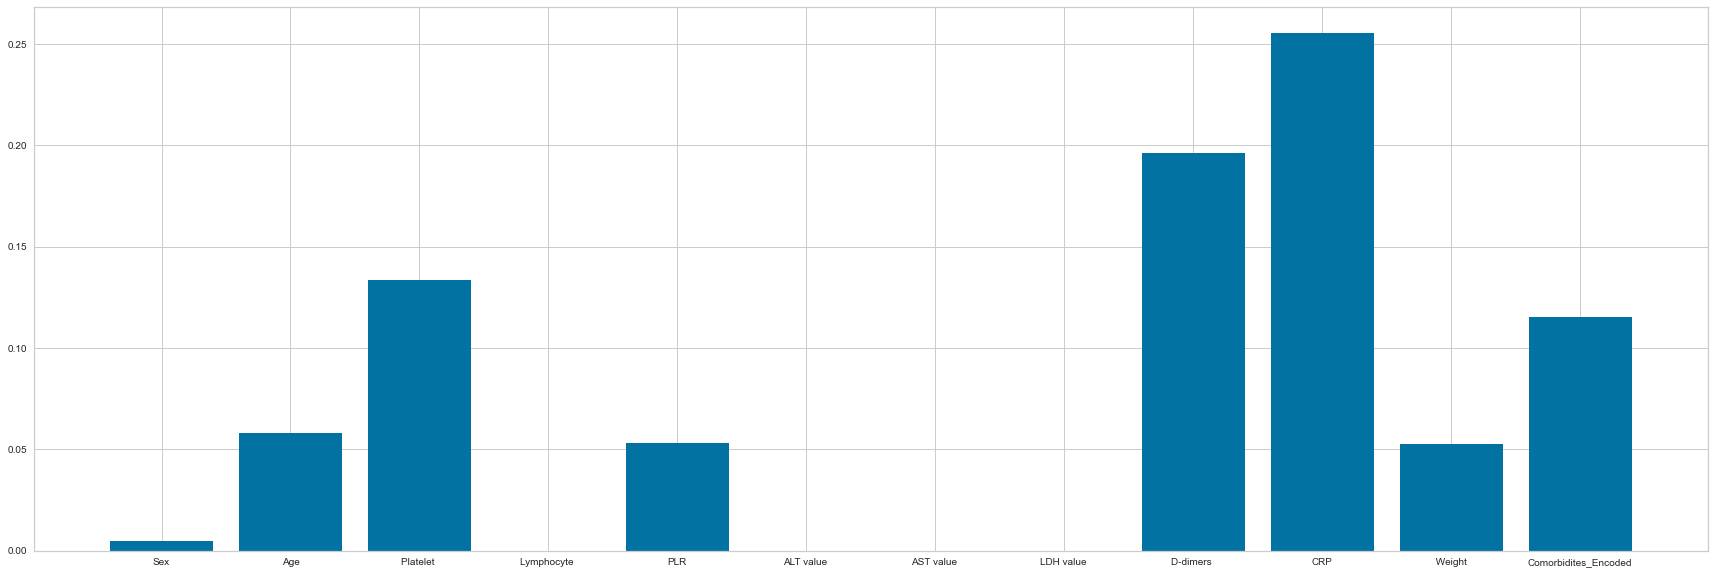

In [24]:
for i in range(len(M_info.scores_)):
    print('Feature %d: %f' % (i, M_info.scores_[i]))

#plt.bar([i for i in range(len(Anova.scores_))],  Anova.scores_ )
fig = plt.figure(figsize = (30, 10))
plt.bar([name for name in (data_fea.columns)], M_info.scores_ )
plt.show()

In [25]:
train_MI = train[['Platelet ','D-dimers ','CRP','Comorbidites_Encoded' ]]
test_MI = test[['Platelet ','D-dimers ','CRP','Comorbidites_Encoded' ]]

In [26]:
classifiers = [LogisticRegression() ,
               DecisionTreeClassifier(),
               GaussianNB(),
               SVC(gamma='scale', probability=True),
               KNeighborsClassifier()]


In [27]:
scaler = preprocessing.StandardScaler()
X_train = train_chi2.iloc[: ,0:4].values
X_test = test_chi2.iloc[: ,0:4].values
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [28]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


>LogisticRegression: 
Accuracy:  0.7319587628865979
recall_score: 0.7319587628865979
sensitivity_specificity: (0.7319587628865979, 0.7319587628865979, None)
error :  0.2680412371134021


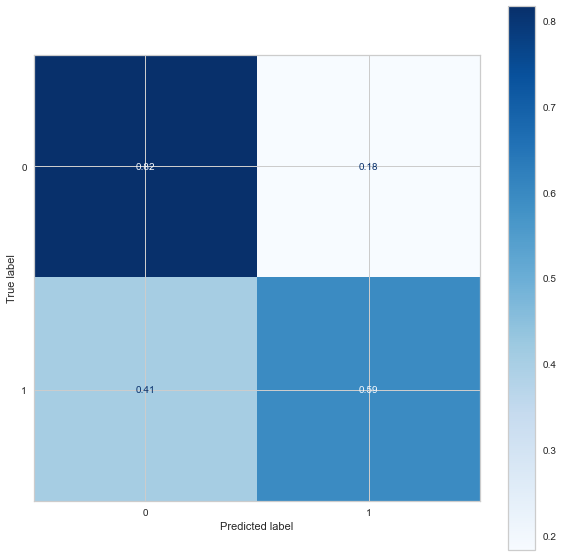

>DecisionTreeClassifier: 
Accuracy:  0.5979381443298969
recall_score: 0.5979381443298969
sensitivity_specificity: (0.5979381443298969, 0.5979381443298969, None)
error :  0.4020618556701031


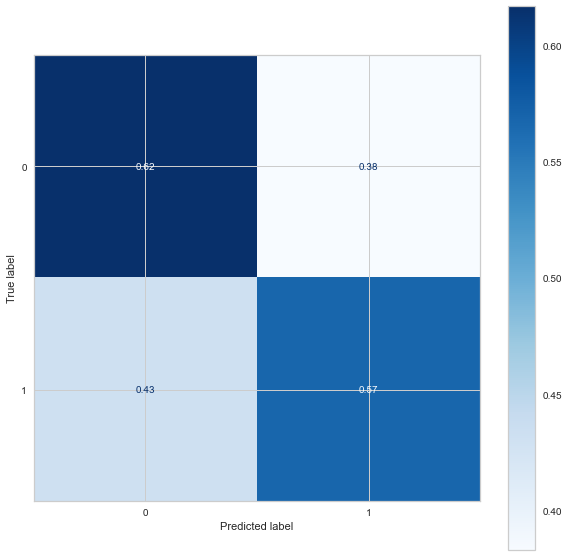

>GaussianNB: 
Accuracy:  0.6185567010309279
recall_score: 0.6185567010309279
sensitivity_specificity: (0.6185567010309279, 0.6185567010309279, None)
error :  0.38144329896907214


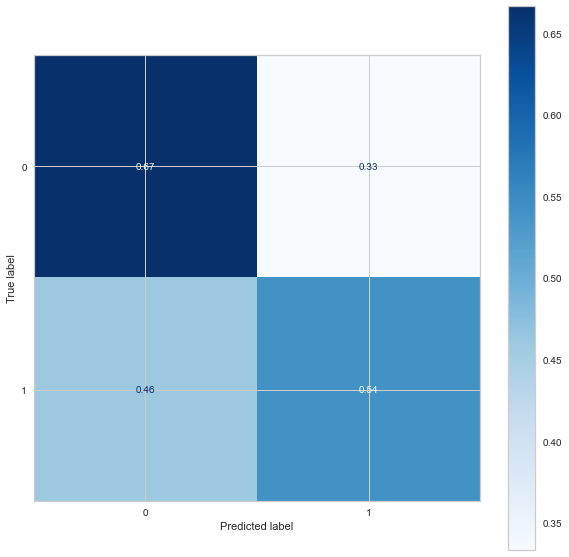

>SVC: 
Accuracy:  0.7216494845360825
recall_score: 0.7216494845360825
sensitivity_specificity: (0.7216494845360825, 0.7216494845360825, None)
error :  0.27835051546391754


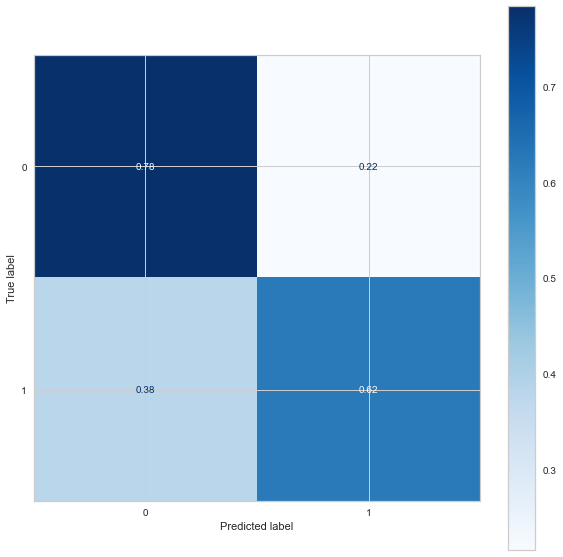

>KNeighborsClassifier: 
Accuracy:  0.6804123711340206
recall_score: 0.6804123711340206
sensitivity_specificity: (0.6804123711340206, 0.6804123711340206, None)
error :  0.31958762886597936


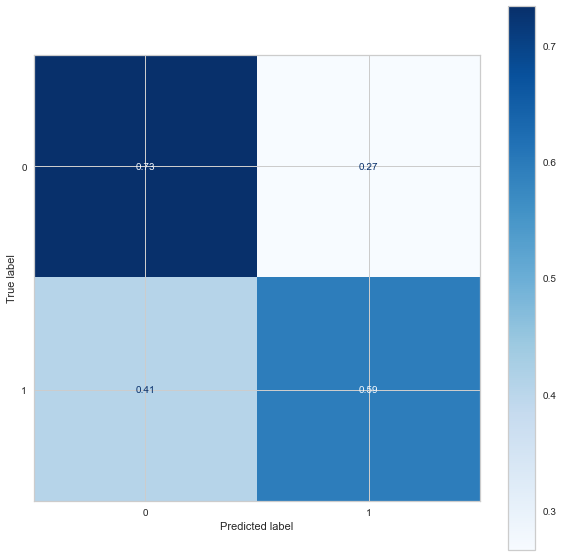

In [28]:
from imblearn.metrics import sensitivity_specificity_support


for c in classifiers:
    c.fit(X_train, y_train)

for c in classifiers:
    yhat = c.predict(X_test)
    print('>%s: ' % (c.__class__.__name__))
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ',score )
    score = recall_score(y_test, yhat, average="micro")
    print('recall_score:',score )
    score = sensitivity_specificity_support(y_test, yhat, average='micro')
    print('sensitivity_specificity:',score )
    print ('error : ', zero_one_loss(y_test, yhat))
          
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of Chi_2 subset ')

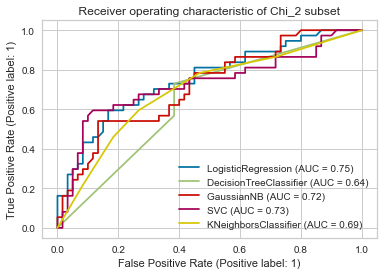

In [29]:
ax = plt.gca()
for c in classifiers:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of Chi_2 subset ")

In [30]:
X_train = train_anova.iloc[: ,0:5].values
X_test = test_anova.iloc[: ,0:5].values
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)


Accuracy: 
>LogisticRegression: 0.711
f1_score: 
>LogisticRegression: 0.702
precision_score: 
>LogisticRegression: 0.700
recall_score: 
>LogisticRegression: 0.710
error :  0.28865979381443296


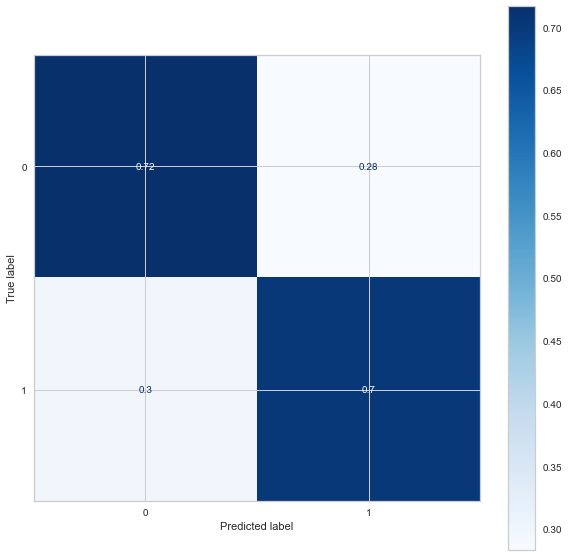

Accuracy: 
>DecisionTreeClassifier: 0.660
f1_score: 
>DecisionTreeClassifier: 0.645
precision_score: 
>DecisionTreeClassifier: 0.643
recall_score: 
>DecisionTreeClassifier: 0.647
error :  0.3402061855670103


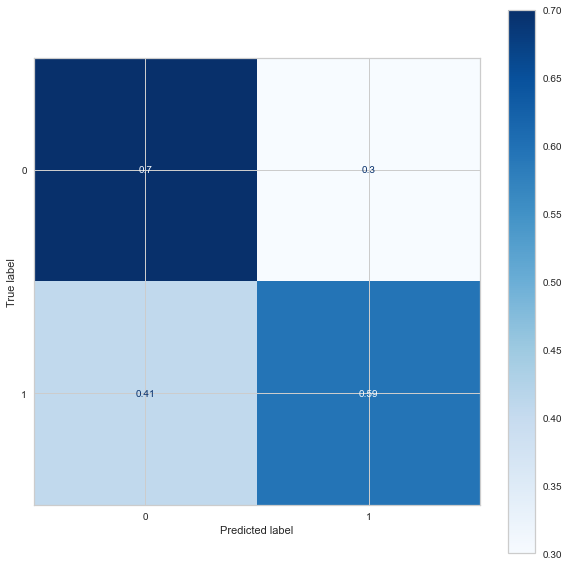

Accuracy: 
>GaussianNB: 0.711
f1_score: 
>GaussianNB: 0.700
precision_score: 
>GaussianNB: 0.698
recall_score: 
>GaussianNB: 0.705
error :  0.28865979381443296


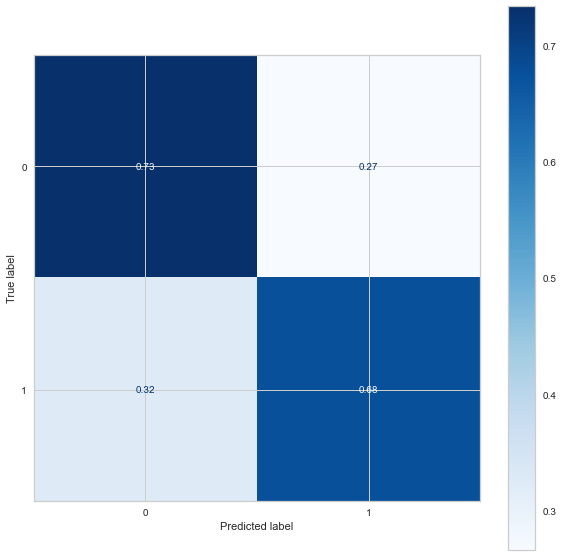

Accuracy: 
>SVC: 0.753
f1_score: 
>SVC: 0.740
precision_score: 
>SVC: 0.739
recall_score: 
>SVC: 0.743
error :  0.24742268041237114


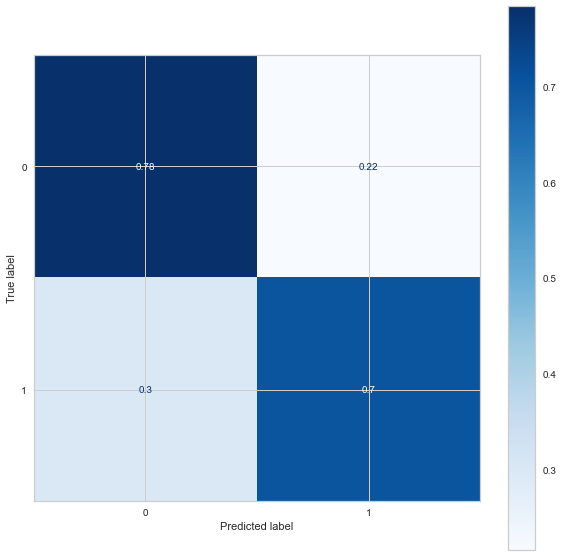

Accuracy: 
>KNeighborsClassifier: 0.753
f1_score: 
>KNeighborsClassifier: 0.735
precision_score: 
>KNeighborsClassifier: 0.738
recall_score: 
>KNeighborsClassifier: 0.733
error :  0.24742268041237114


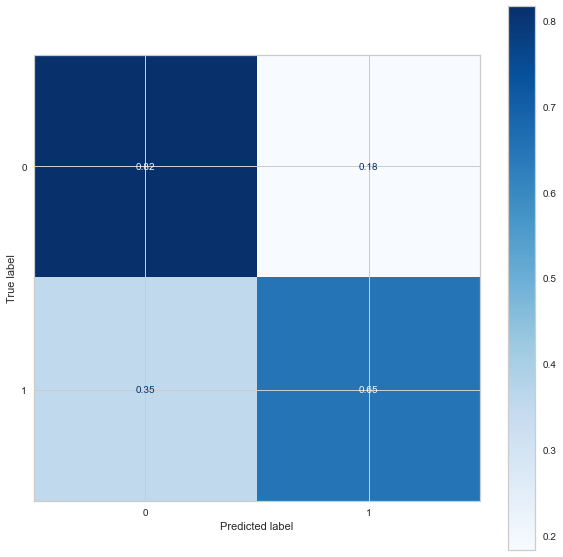

In [31]:
for c in classifiers:
    c.fit(X_train, y_train)


for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of Anova subset ')

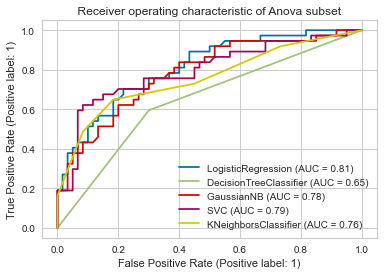

In [32]:
ax = plt.gca()
for c in classifiers:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of Anova subset ")

In [33]:
X_train = train_MI.iloc[: ,0:5].values
X_test = test_MI.iloc[: ,0:5].values
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)


Accuracy: 
>LogisticRegression: 0.742
f1_score: 
>LogisticRegression: 0.728
precision_score: 
>LogisticRegression: 0.727
recall_score: 
>LogisticRegression: 0.730
error :  0.25773195876288657


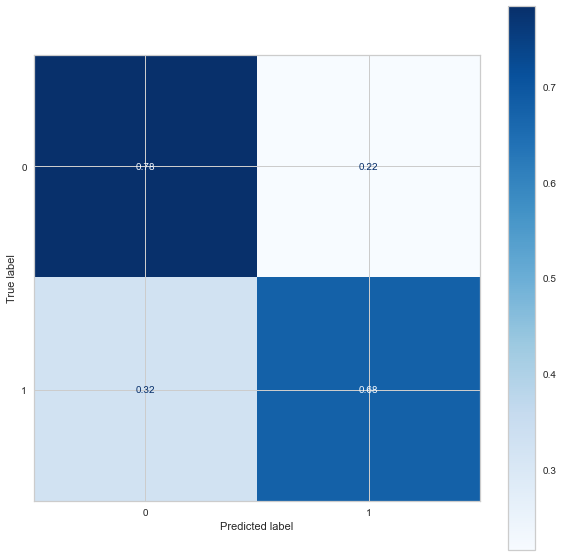

Accuracy: 
>DecisionTreeClassifier: 0.701
f1_score: 
>DecisionTreeClassifier: 0.669
precision_score: 
>DecisionTreeClassifier: 0.682
recall_score: 
>DecisionTreeClassifier: 0.665
error :  0.2989690721649485


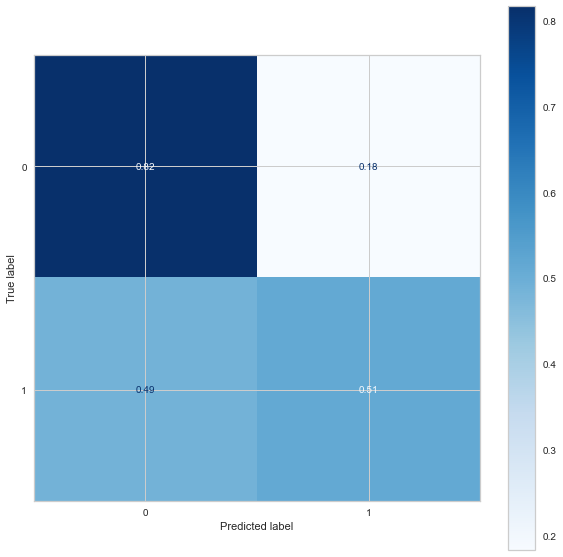

Accuracy: 
>GaussianNB: 0.732
f1_score: 
>GaussianNB: 0.713
precision_score: 
>GaussianNB: 0.716
recall_score: 
>GaussianNB: 0.711
error :  0.2680412371134021


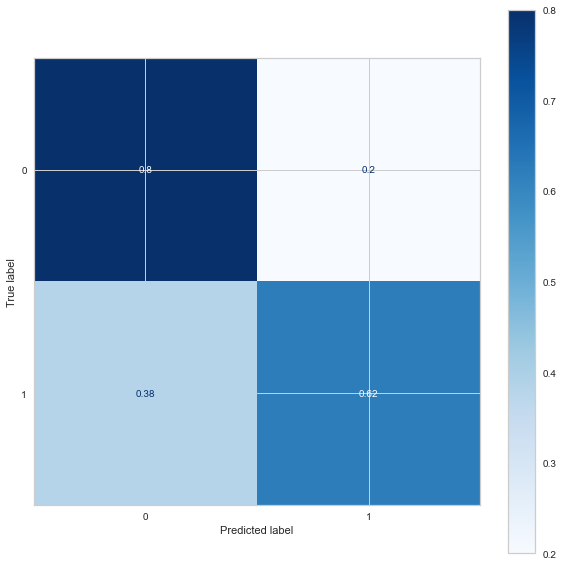

Accuracy: 
>SVC: 0.742
f1_score: 
>SVC: 0.722
precision_score: 
>SVC: 0.727
recall_score: 
>SVC: 0.719
error :  0.25773195876288657


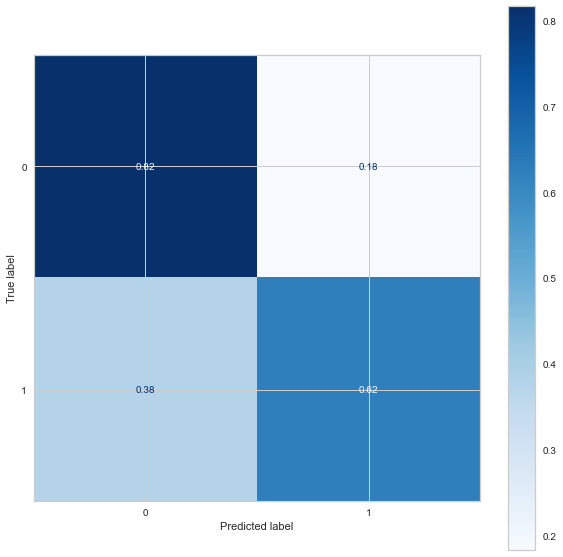

Accuracy: 
>KNeighborsClassifier: 0.732
f1_score: 
>KNeighborsClassifier: 0.716
precision_score: 
>KNeighborsClassifier: 0.716
recall_score: 
>KNeighborsClassifier: 0.716
error :  0.2680412371134021


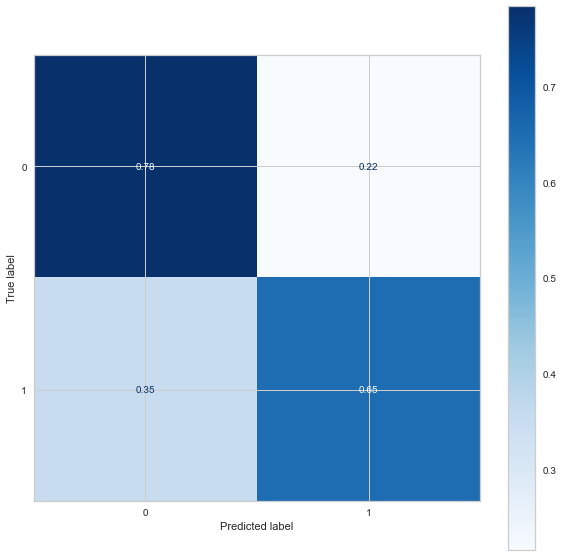

In [34]:
for c in classifiers:
    c.fit(X_train, y_train)

for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of Mutual Information subset ')

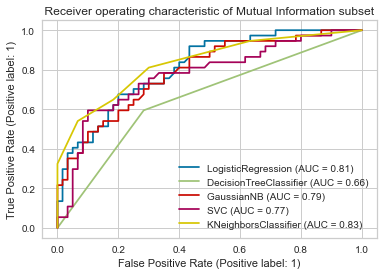

In [36]:
ax = plt.gca()
for c in classifiers:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of Mutual Information subset ")

In [35]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout( title="Representation of reduced Data by UMAP",  showlegend =True, margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()  

In [69]:
X= data_fea.iloc[:, 0:14].values
#X =  scaler.fit_transform(X)

In [36]:
reducer = umap.UMAP(n_neighbors=10,random_state=42,n_components=3)
reducer.embedding_ =reducer.fit_transform(X, y=y )
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])


In [37]:
data_umap = pd.DataFrame(data = reducer.embedding_
             , columns = ['component 1', 'component 2','component 3'])

In [38]:
data_umap

component 1  component 2  component 3
0      -1.520337     1.406804    10.077389
1      -2.480191     1.164555     6.898706
2      -2.084671     3.657737     7.785969
3      -2.638783     1.515373     8.850795
4      -2.460043     2.451178     8.660308
..           ...          ...          ...
317    15.855945     8.961545     5.632548
318    14.501167     9.251890     7.767476
319    15.206561    10.051725     5.444140
320    14.785249     8.341333     6.344284
321    16.014034     9.457952     5.082690

[322 rows x 3 columns]

In [39]:
X = data_umap.iloc[:, 0:3].values
#X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
y_train.value_counts()

0    131
1     94
Name: Classification, dtype: int64

In [41]:
y_test.value_counts()

0    60
1    37
Name: Classification, dtype: int64

Accuracy: 
>LogisticRegression: 1.000
f1_score: 
>LogisticRegression: 1.000
precision_score: 
>LogisticRegression: 1.000
recall_score: 
>LogisticRegression: 1.000
error :  0.0


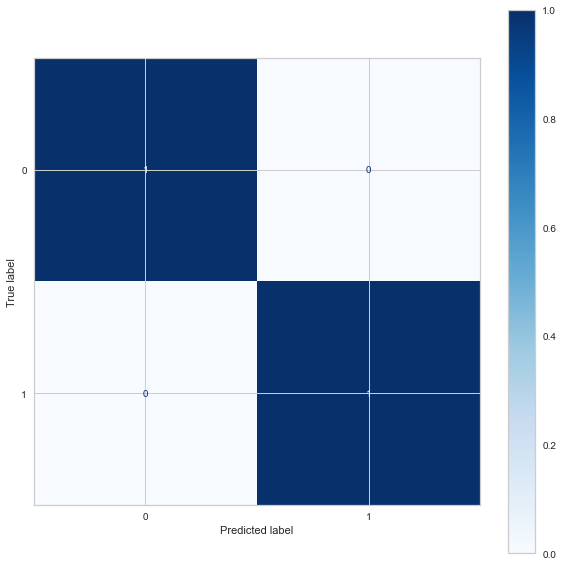

Accuracy: 
>DecisionTreeClassifier: 1.000
f1_score: 
>DecisionTreeClassifier: 1.000
precision_score: 
>DecisionTreeClassifier: 1.000
recall_score: 
>DecisionTreeClassifier: 1.000
error :  0.0


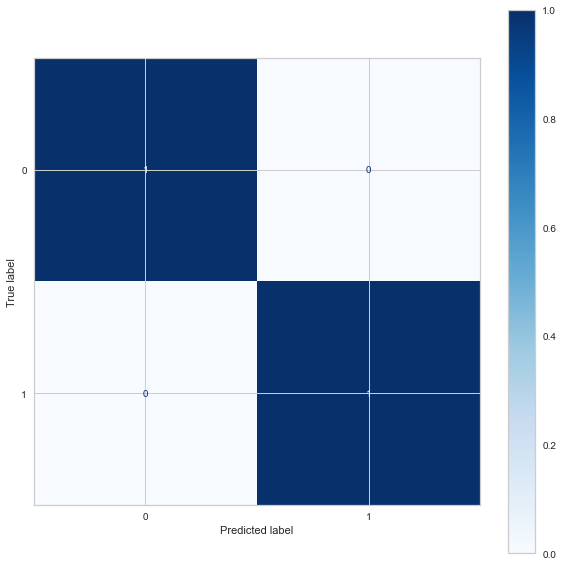

Accuracy: 
>GaussianNB: 1.000
f1_score: 
>GaussianNB: 1.000
precision_score: 
>GaussianNB: 1.000
recall_score: 
>GaussianNB: 1.000
error :  0.0


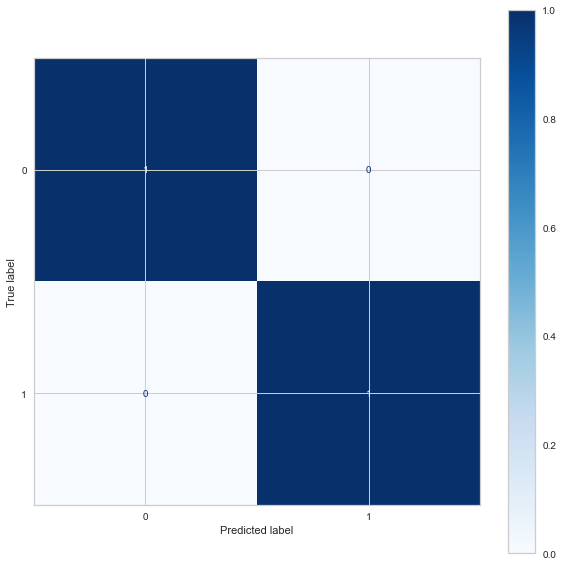

Accuracy: 
>SVC: 1.000
f1_score: 
>SVC: 1.000
precision_score: 
>SVC: 1.000
recall_score: 
>SVC: 1.000
error :  0.0


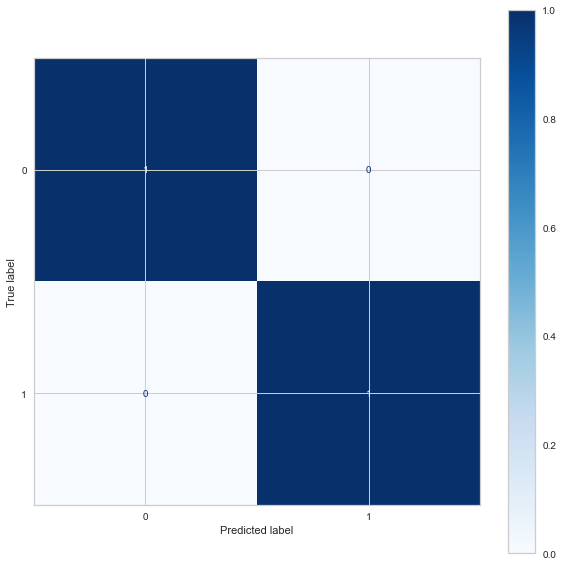

Accuracy: 
>KNeighborsClassifier: 1.000
f1_score: 
>KNeighborsClassifier: 1.000
precision_score: 
>KNeighborsClassifier: 1.000
recall_score: 
>KNeighborsClassifier: 1.000
error :  0.0


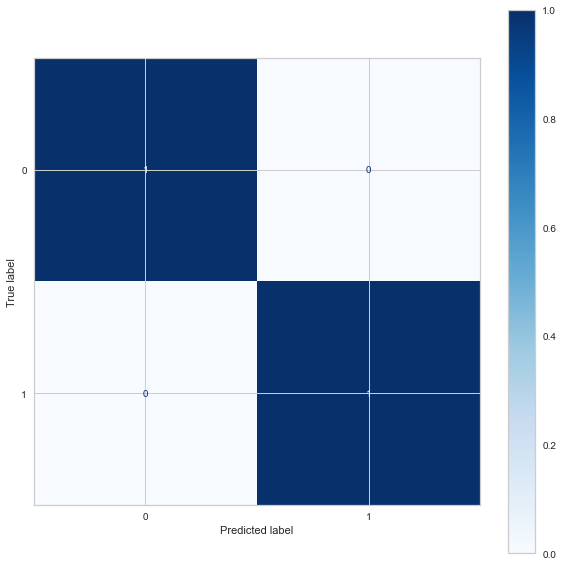

In [42]:
for c in classifiers:
    c.fit(X_train, y_train)


# evaluate contributing models
for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of UMAP subset ')

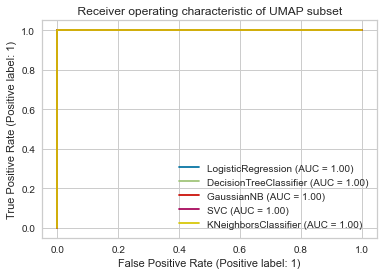

In [43]:
ax = plt.gca()
for c in classifiers:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of UMAP subset ")

In [44]:
classifiers2 = [XGBClassifier(),
               AdaBoostClassifier(),
               RandomForestClassifier(n_estimators=10),
               ExtraTreesClassifier(n_estimators=10)]

[12:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 
>LogisticRegression: 1.000
f1_score: 
>LogisticRegression: 1.000
precision_score: 
>LogisticRegression: 1.000
recall_score: 
>LogisticRegression: 1.000
error :  0.0


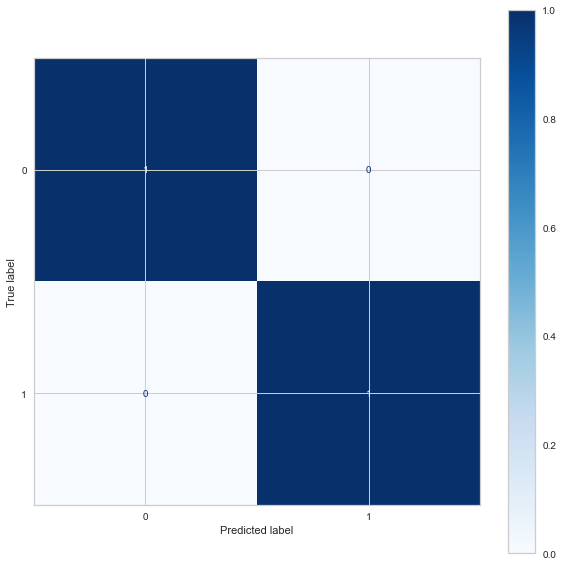

Accuracy: 
>DecisionTreeClassifier: 1.000
f1_score: 
>DecisionTreeClassifier: 1.000
precision_score: 
>DecisionTreeClassifier: 1.000
recall_score: 
>DecisionTreeClassifier: 1.000
error :  0.0


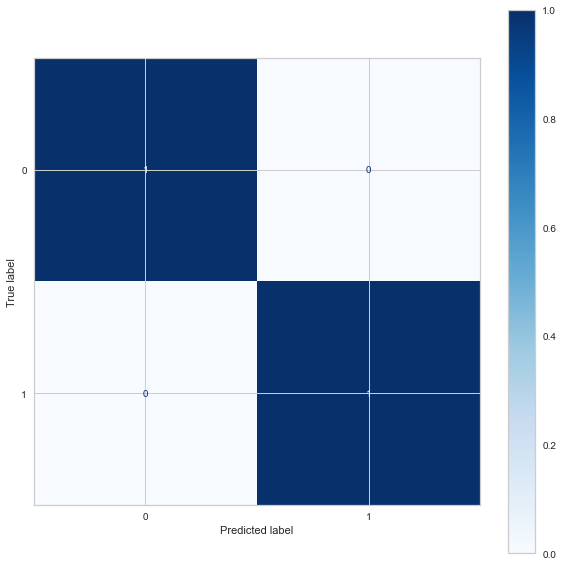

Accuracy: 
>GaussianNB: 1.000
f1_score: 
>GaussianNB: 1.000
precision_score: 
>GaussianNB: 1.000
recall_score: 
>GaussianNB: 1.000
error :  0.0


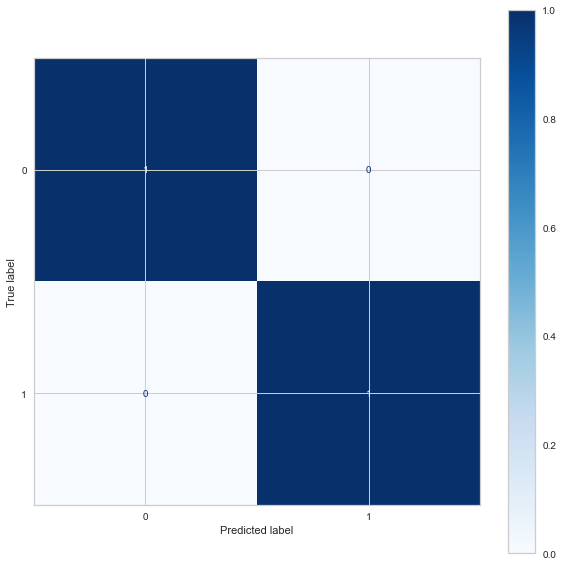

Accuracy: 
>SVC: 1.000
f1_score: 
>SVC: 1.000
precision_score: 
>SVC: 1.000
recall_score: 
>SVC: 1.000
error :  0.0


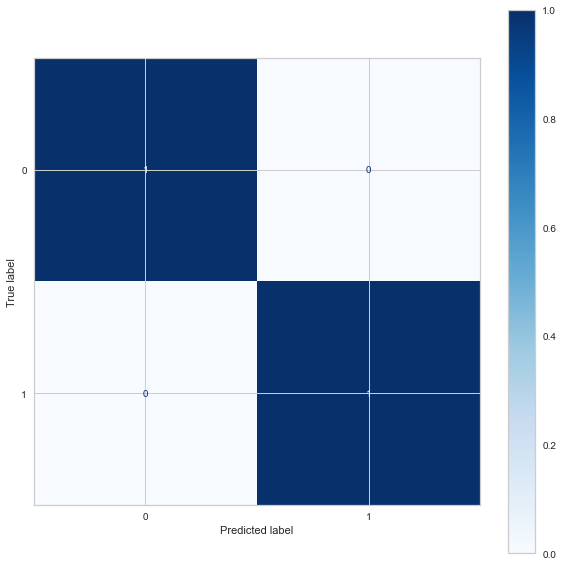

Accuracy: 
>KNeighborsClassifier: 1.000
f1_score: 
>KNeighborsClassifier: 1.000
precision_score: 
>KNeighborsClassifier: 1.000
recall_score: 
>KNeighborsClassifier: 1.000
error :  0.0


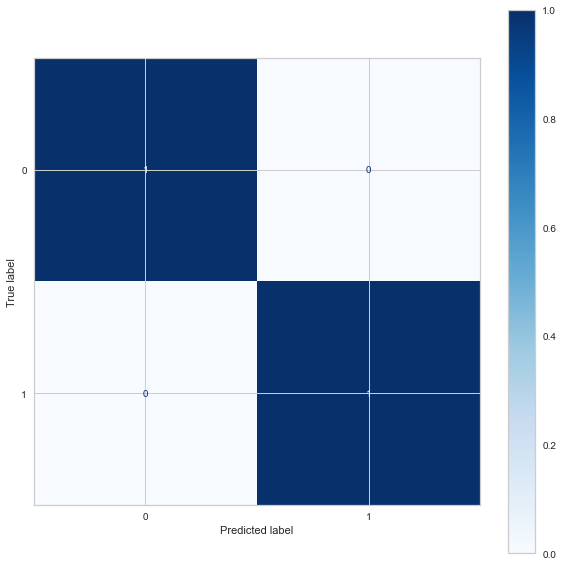

In [45]:
for c in classifiers2:
    c.fit(X_train, y_train)


# evaluate contributing models
for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of UMAP subset ')

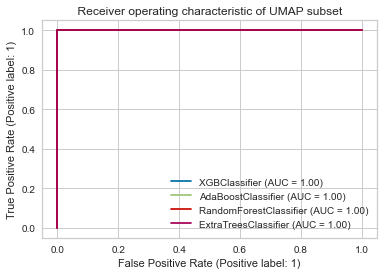

In [46]:
ax = plt.gca()
for c in classifiers2:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of UMAP subset ")

In [47]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout( title="Representation of reduced Data by PCA",  showlegend =True, margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()  

In [48]:
X= data_fea.iloc[:, 0:14].values
X =  scaler.fit_transform(X)

In [49]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

In [50]:
data_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


In [51]:
data_pca

principal component 1  principal component 2  principal component 3
0                -0.932009              -0.347006              -1.003247
1                 2.652991               1.731851              -0.503600
2                 0.011431               2.053841              -0.982866
3                 2.058877              -1.585601               0.709370
4                -1.126012              -0.906303               1.413387
..                     ...                    ...                    ...
317               2.034815               0.188320              -1.423818
318               1.004600               1.116070              -0.507434
319              -0.011638              -0.697192               0.574239
320               2.382085              -2.055637               0.856704
321               0.698640               0.475268               1.482410

[322 rows x 3 columns]

In [51]:
X = data_pca.iloc[:, 0:3].values
#X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [137]:
y_train.value_counts()

0    131
1     94
Name: Classification, dtype: int64

In [138]:
y_test.value_counts()

0    60
1    37
Name: Classification, dtype: int64

Accuracy: 
>LogisticRegression: 0.701
f1_score: 
>LogisticRegression: 0.690
precision_score: 
>LogisticRegression: 0.689
recall_score: 
>LogisticRegression: 0.696
error :  0.2989690721649485


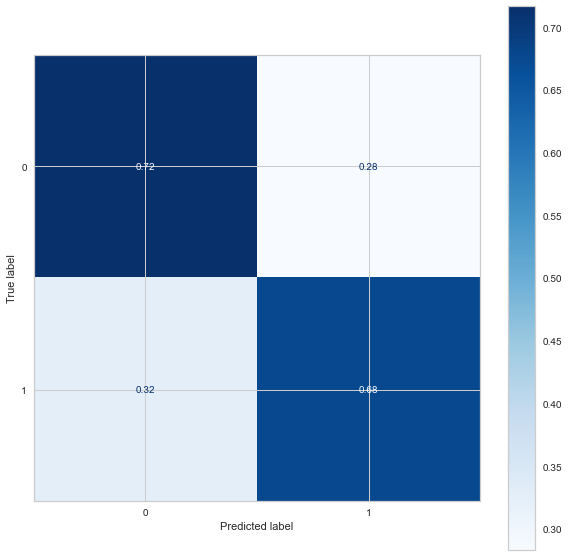

Accuracy: 
>DecisionTreeClassifier: 0.619
f1_score: 
>DecisionTreeClassifier: 0.613
precision_score: 
>DecisionTreeClassifier: 0.617
recall_score: 
>DecisionTreeClassifier: 0.624
error :  0.38144329896907214


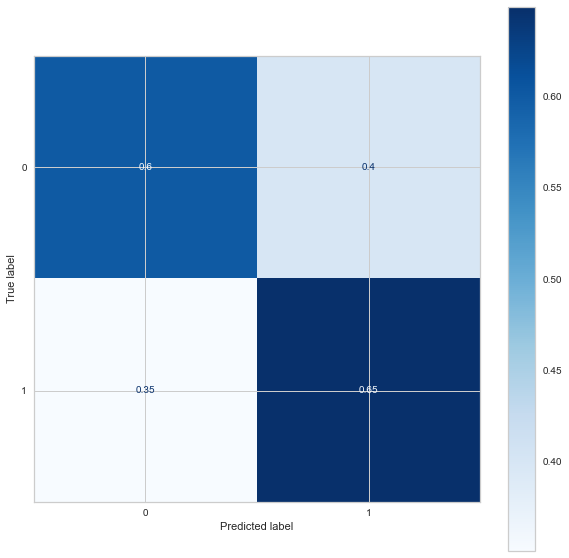

Accuracy: 
>GaussianNB: 0.701
f1_score: 
>GaussianNB: 0.685
precision_score: 
>GaussianNB: 0.684
recall_score: 
>GaussianNB: 0.686
error :  0.2989690721649485


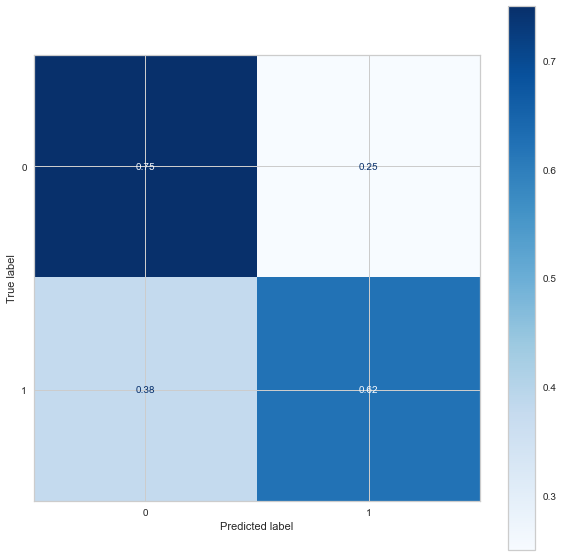

Accuracy: 
>SVC: 0.732
f1_score: 
>SVC: 0.723
precision_score: 
>SVC: 0.721
recall_score: 
>SVC: 0.732
error :  0.2680412371134021


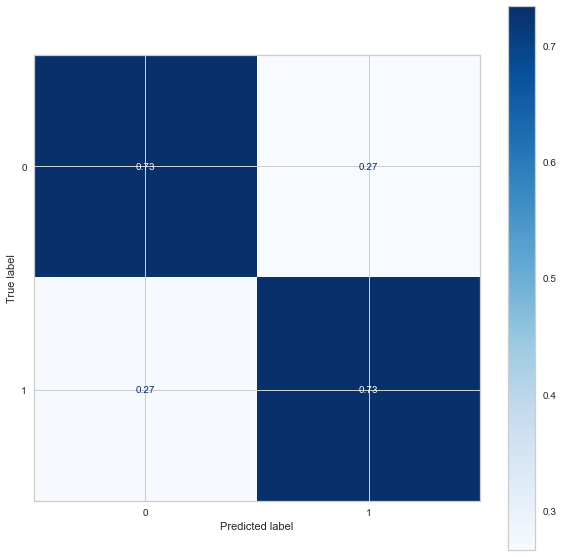

Accuracy: 
>KNeighborsClassifier: 0.649
f1_score: 
>KNeighborsClassifier: 0.641
precision_score: 
>KNeighborsClassifier: 0.642
recall_score: 
>KNeighborsClassifier: 0.649
error :  0.35051546391752575


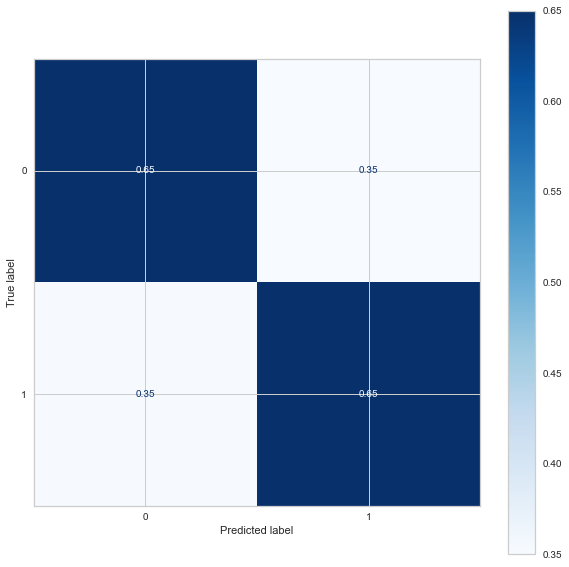

In [52]:
for c in classifiers:
    c.fit(X_train, y_train)


for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()

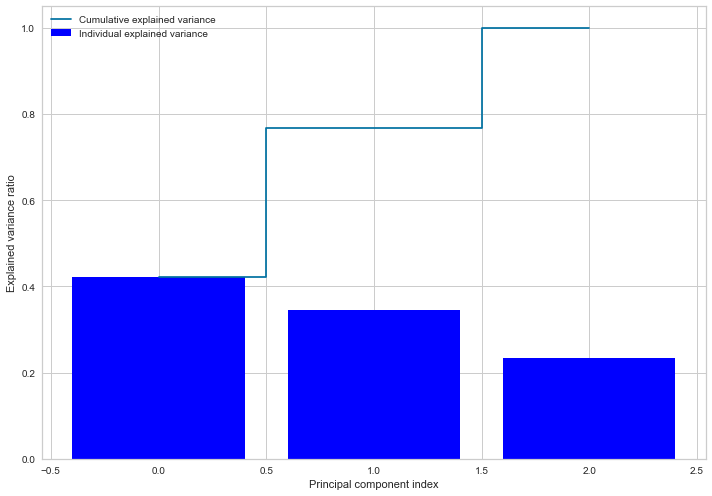

In [53]:
pca = PCA()
data_àca = pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
fig = plt.figure(figsize =(10, 7))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=1, align='center', label='Individual explained variance' ,color ='blue')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, ' Receiver operating characteristic of PCA subset ')

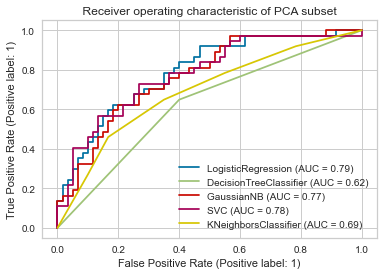

In [54]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
for c in classifiers:
    plot_roc_curve(c, X_test, y_test, ax=ax)
plt.title(" Receiver operating characteristic of PCA subset ")

In [73]:
X = data_umap.iloc[:, 0:3].values
#X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [74]:
 classifiers2 = [XGBClassifier(),
               AdaBoostClassifier(),
               RandomForestClassifier(n_estimators=10),
               ExtraTreesClassifier(n_estimators=10)]

[00:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 
>LogisticRegression: 0.845
f1_score: 
>LogisticRegression: 0.844
precision_score: 
>LogisticRegression: 0.856
recall_score: 
>LogisticRegression: 0.875
error :  0.15463917525773196


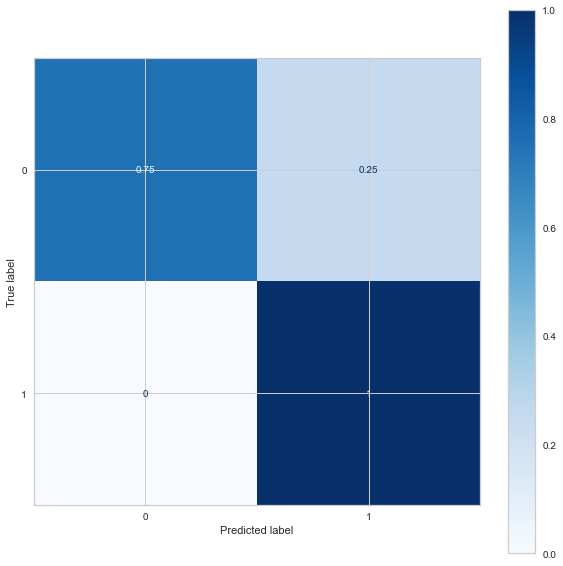

Accuracy: 
>DecisionTreeClassifier: 0.887
f1_score: 
>DecisionTreeClassifier: 0.885
precision_score: 
>DecisionTreeClassifier: 0.885
recall_score: 
>DecisionTreeClassifier: 0.908
error :  0.11340206185567014


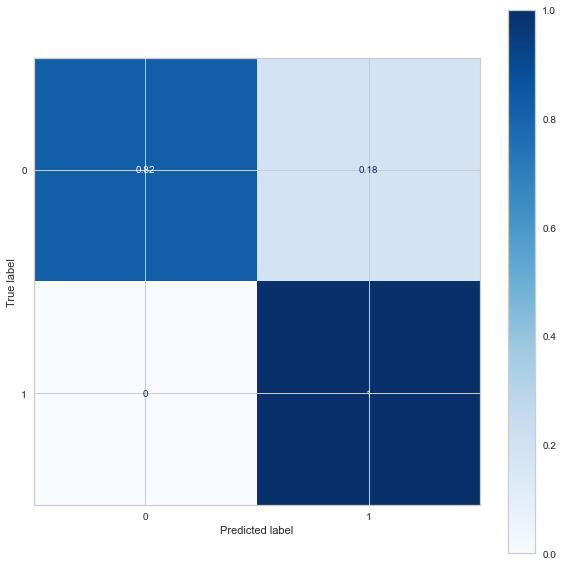

Accuracy: 
>GaussianNB: 1.000
f1_score: 
>GaussianNB: 1.000
precision_score: 
>GaussianNB: 1.000
recall_score: 
>GaussianNB: 1.000
error :  0.0


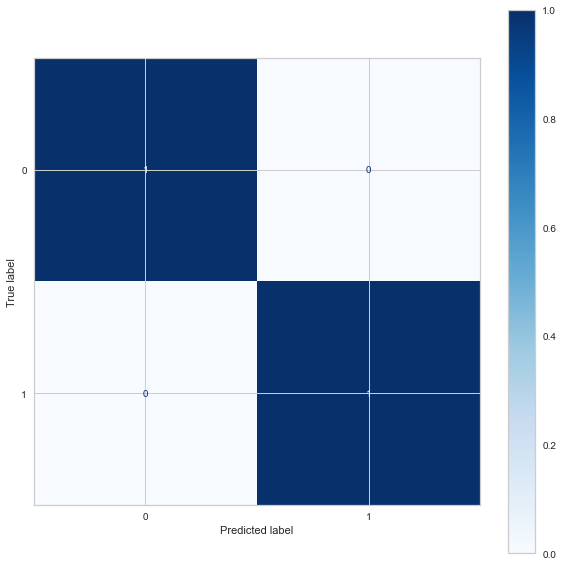

Accuracy: 
>SVC: 0.619
f1_score: 
>SVC: 0.382
precision_score: 
>SVC: 0.309
recall_score: 
>SVC: 0.500
error :  0.38144329896907214


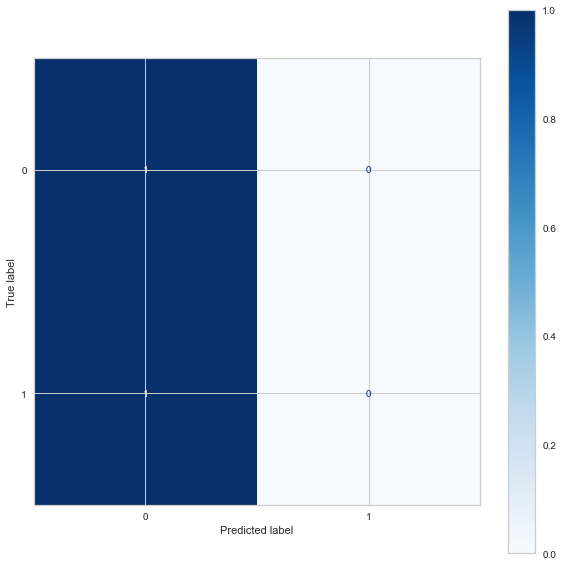

Accuracy: 
>KNeighborsClassifier: 0.495
f1_score: 
>KNeighborsClassifier: 0.364
precision_score: 
>KNeighborsClassifier: 0.346
recall_score: 
>KNeighborsClassifier: 0.410
error :  0.5051546391752577


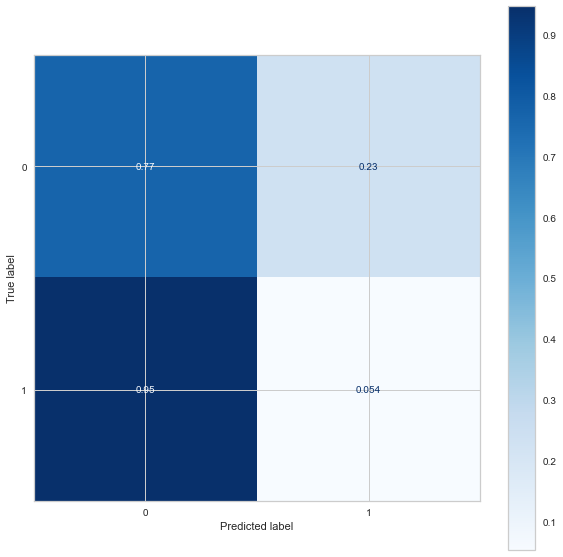

In [66]:
for c in classifiers2:
    c.fit(X_train, y_train)


# evaluate contributing models
for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ' )
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('f1_score: ' )
    score = f1_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('precision_score: ' )
    score = precision_score(y_test, yhat, average="macro")
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print('recall_score: ' )
    score = recall_score(y_test, yhat, average="macro")    
    print('>%s: %.3f' % (c.__class__.__name__, score))
    print ('error : ', zero_one_loss(y_test, yhat))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(c, X_test, y_test,normalize='true',  cmap=plt.cm.Blues, ax=ax)
    plt.show()